In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gapminder import gapminder

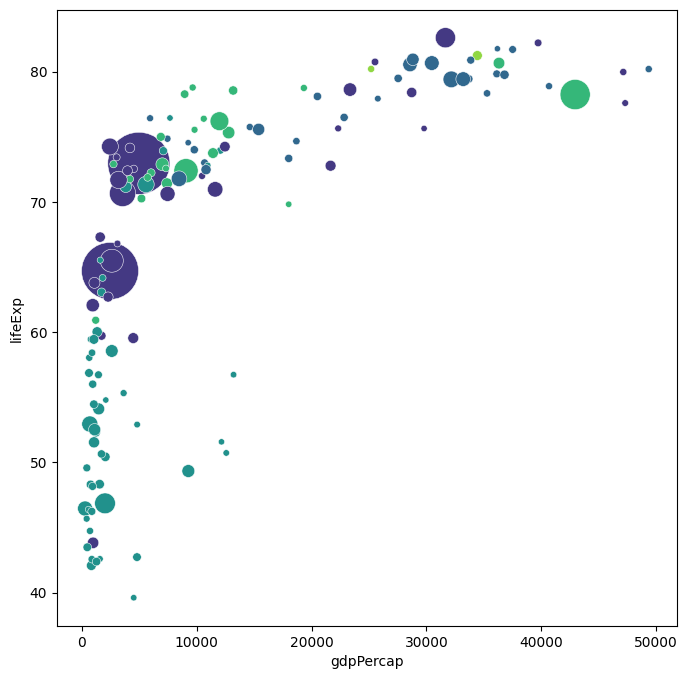

In [13]:
data = gapminder.loc[gapminder.year == 2007]
plt.rcParams['figure.figsize'] = [8, 8]
# scatterplot으로 bubble chart 만들기
# 이 차트에서는 size를 "pop"(population)으로 지정
# sizes는 최소 최대 범위에서 정규화가 되게끔 하는 파라미터
sns.scatterplot(data=data, 
                x="gdpPercap", 
                y="lifeExp", 
                size="pop", 
                legend=False, 
                hue="continent",
                palette="viridis",
                edgecolors='black',
                sizes=(20, 2000))

plt.show()

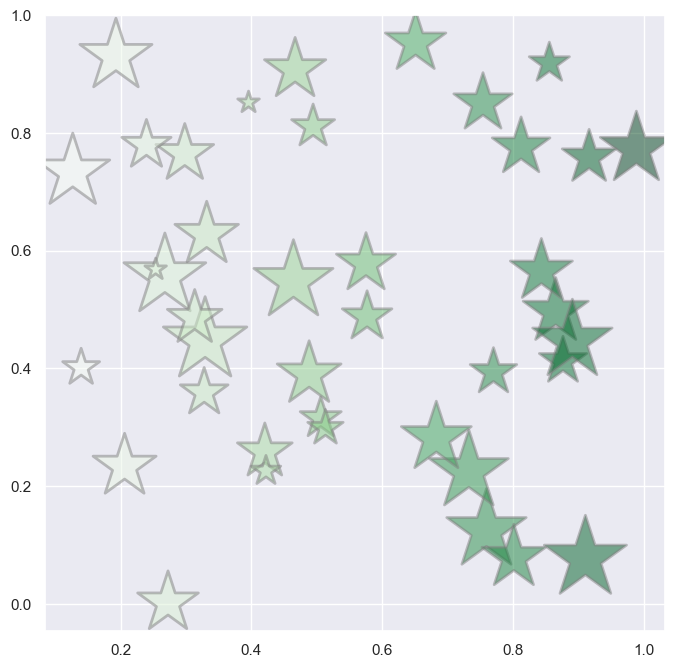

In [28]:
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
sns.set_theme()
plt.scatter(x, 
            y, 
            s=z*4000, 
            alpha=0.5, 
            c=x,
            cmap='Greens',
            marker='*',
            edgecolors='grey',
            linewidth=2)
plt.show()

In [29]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/gapminderData.csv')


C:\Users\Admin\AppData\Local\Temp\ipykernel_26484\655156398.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,50000)


(30.0, 75.0)

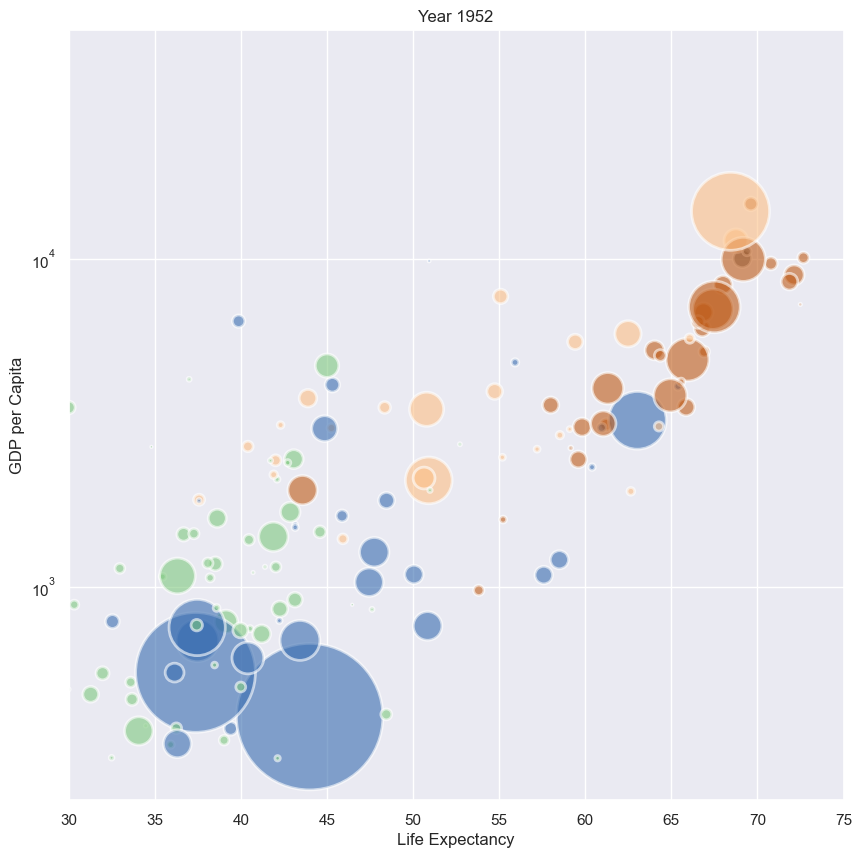

In [30]:
data['continent']=pd.Categorical(data['continent'])

plt.figure(figsize=(10, 10))
data1952 = data[ data.year == 1952 ]

plt.scatter(
    x = data1952['lifeExp'], 
    y = data1952['gdpPercap'], 
    s=data1952['pop']/50000, 
    c=data1952['continent'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2)

plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year 1952")
plt.ylim(0,50000)
plt.xlim(30, 75)

In [33]:
# image resolution
dpi=96

# For each year:
for i in data.year.unique():
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = data[ data.year == i ]

    # Build the scatterplot
    plt.scatter(
        x=subsetData['lifeExp'], 
        y=subsetData['gdpPercap'], 
        s=subsetData['pop']/200000 , 
        c=subsetData['continent'].cat.codes, 
        cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    
    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)
    
    # Save it & close the figure
    filename='./Bubble_png/Gapminder_step'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)


C:\Users\Admin\AppData\Local\Temp\ipykernel_26484\731105415.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100000)


### 우분투 환경에서 png들을 모아 gif로 만들기
##### sudo apt-get update
##### sudo apt-get install imagemagick
##### convert -delay 80 Gapminder*.png animated_gapminder.gif

In [35]:
import palmerpenguins
data = palmerpenguins.load_penguins()

In [36]:
FLIPPER_LENGTH = data["flipper_length_mm"].values
BILL_LENGTH = data["bill_length_mm"].values

SPECIES = data["species"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

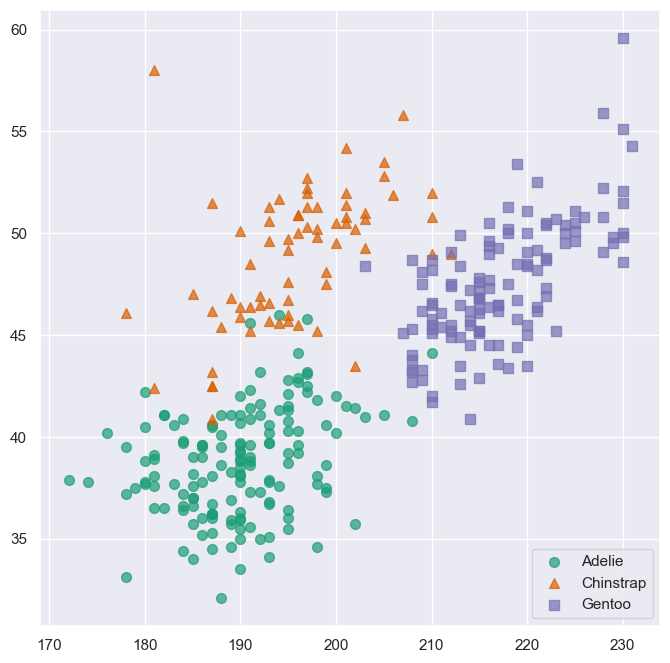

In [39]:
MARKERS = ["o", "^", "s"] # circle, triangle, square

fig, ax = plt.subplots(figsize=(8,8))

for species, color, marker in zip(SPECIES_, COLORS, MARKERS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, marker=marker, alpha=0.7
    )
    
ax.legend()
fig